# HOJA DE TRABAJO 5

*Ale Gudiel, José Pablo Ponce, Gabriel Quiroz*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np
import random
import pyclustertend 
import plotly.express as px
import seaborn as sb
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

## 1) Use los mismos conjuntos de entrenamiento y prueba que utilizó en las dos hojas anteriores.

In [3]:
datos = pd.read_csv("train.csv", encoding='ISO-8859-1')
datos_cluster = datos[["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"]].copy()

In [7]:
def clasificacion_casas(precio):
    if (precio >= 34900 and precio<163000):
        return "Economica"
    elif (precio>= 163000 and precio<214000):
        return "Intermedia"
    else:
        return "Cara"


In [8]:
datos_cluster['clasificacion'] =  datos_cluster.apply(lambda row : clasificacion_casas(row['SalePrice']), axis = 1)

In [65]:
datos_cluster

,SalePrice,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,YearBuilt,OverallQual,clasificacion
0,208500,548,2,8,2,1710,856,856,2003,7,Intermedia
1,181500,460,2,6,2,1262,1262,1262,1976,6,Intermedia
2,223500,608,2,6,2,1786,920,920,2001,7,Cara
3,140000,642,3,7,1,1717,961,756,1915,7,Economica
4,250000,836,3,9,2,2198,1145,1145,2000,8,Cara
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,460,2,7,2,1647,953,953,1999,6,Intermedia
1456,210000,500,2,7,2,2073,2073,1542,1978,6,Intermedia
1457,266500,252,1,9,2,2340,1188,1152,1941,7,Cara
1458,142125,240,1,5,1,1078,1078,1078,1950,5,Economica


In [9]:
y = datos_cluster.pop("clasificacion") #La variable respuesta
X = datos_cluster #El resto de los datos

In [10]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

## 2) Elabore un modelo de bayes ingenuo (naive bayes) utilizando el conjunto de entrenamiento 
y explique los resultados a los que llega. El experimento debe ser reproducible por lo que 
debe  fijar  que  los  conjuntos  de  entrenamiento  y  prueba  sean  los  mismos  siempre que se 
ejecute el código.

In [11]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [16]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print ('Recall: ',recall)

Confusion matrix for Naive Bayes
 [[ 98   0   6]
 [  6 191  10]
 [  8   6 113]]
Accuracy:  0.9178082191780822
Precision:  0.9178082191780822
Recall:  0.9178082191780822


## 3) El modelo debe ser de clasificación, use la variable categórica que hizo con el precio de las casas (barata, media y cara) como variable respuesta

In [23]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

[Text(0.4, 0.8333333333333334, 'Id <= 162950.0\ngini = 0.62\nsamples = 1021\nvalue = [263, 520, 238]\nclass = 1'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 520\nvalue = [0, 520, 0]\nclass = 1'),
 Text(0.6, 0.5, 'Id <= 213745.0\ngini = 0.499\nsamples = 501\nvalue = [263, 0, 238]\nclass = 0'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 238\nvalue = [0, 0, 238]\nclass = 2'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 263\nvalue = [263, 0, 0]\nclass = 0')]

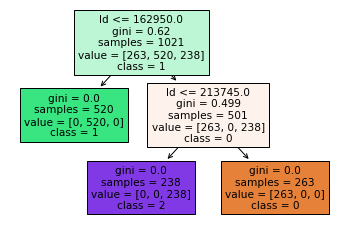

In [24]:
tree.plot_tree(arbol,feature_names=datos.columns,
               class_names=['0','1','2'],filled=True )

In [25]:
X_test

,SalePrice,GarageArea,GarageCars,TotRmsAbvGrd,FullBath,GrLivArea,1stFlrSF,TotalBsmtSF,YearBuilt,OverallQual
1298,160000,1418,2,12,2,5642,4692,6110,2008,10
896,106500,327,1,6,1,951,951,951,1936,4
71,129500,360,2,4,1,845,845,845,1982,4
1145,149000,225,1,8,1,1576,1042,1042,1928,5
672,165000,546,2,6,1,1208,1208,1208,1977,6
...,...,...,...,...,...,...,...,...,...,...
123,153900,530,2,5,2,1199,1199,1199,1993,6
774,395000,895,3,9,2,1973,1973,1935,2006,8
511,202665,474,2,6,2,1368,1368,1368,2005,7
81,153500,405,2,5,2,1337,1337,1237,1998,6


## 4) Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para clasificar.

In [26]:
gaussian = GaussianNB()
gaussian.fit(X_test,y_test)
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [22]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy: ',accuracy)

Confusion matrix for Naive Bayes
 [[ 94   0  10]
 [  2 196   9]
 [  6   7 114]]
Accuracy:  0.9223744292237442


## 5) Haga  un  análisis  de  la  eficiencia  del  algoritmo  usando  una  matriz  de  confusión.  Tenga  en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

In [27]:
print("Matriz de confusion", confusion_matrix(y_test, y_pred))
print("Acuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Matriz de confusion [[ 94   0  10]
 [  2 196   9]
 [  6   7 114]]
Acuracy: 0.9223744292237442
Precision: 0.9236583312273106
Recall: 0.9223744292237442


## 6) Analice el modelo. Explique si hay sobreajuste (overfitting) o no.

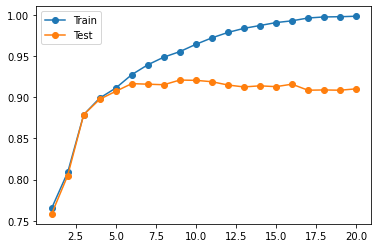

In [28]:
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
	model = DecisionTreeClassifier(max_depth=i)
	model.fit(X_train, y_train)
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)

# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [33]:
print("Accuracy:", metrics.accuracy_score(y_test, test_yhat))
print("Precision:", metrics.precision_score(y_test, test_yhat, average='weighted'))

Accuracy: 0.9103333333333333
Precision: 0.9105307209689363


En este caso, podemos observar que no existe un *overfitting* en el modelo. Podemos apreciar únicamente cómo los datos tienen una intersección pero a medida que el modelo mejora el aprendizaje, la data se distribuye de manera uniforme.

## 7) Haga  un  modelo  usando  validación  cruzada,  compare  los  resultados  de  este  con  los  del modelo anterior. ¿Cuál funcionó mejor?

In [29]:
crossVal = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(crossVal, X, y, cv=5)

In [30]:
print("Accuracy with standard deviation of: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy with standard deviation of: 0.86 (+/- 0.01)


Al comparar los resultados obtenidos, podemos comprobar que el modelo de overfitting funcionó mejor ya que tuvo una precisión de 0.9103 contrastando al de la validación cruzada que tuvo 0.86.

## 8) Compare la eficiencia del algoritmo con el resultado obtenido con el árbol de decisión (el de clasificación). ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?

*Árbol de clasificación*

In [38]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
arbol = arbol.fit(X_train, y_train)

In [39]:
predArbol = arbol.predict(X_test)

In [42]:
print("Accuracy:", metrics.accuracy_score(y_test, predArbol))
print("Precision:", metrics.precision_score(y_test, predArbol, average='weighted'))

Accuracy: 0.8976666666666666
Precision: 0.9022946213523425


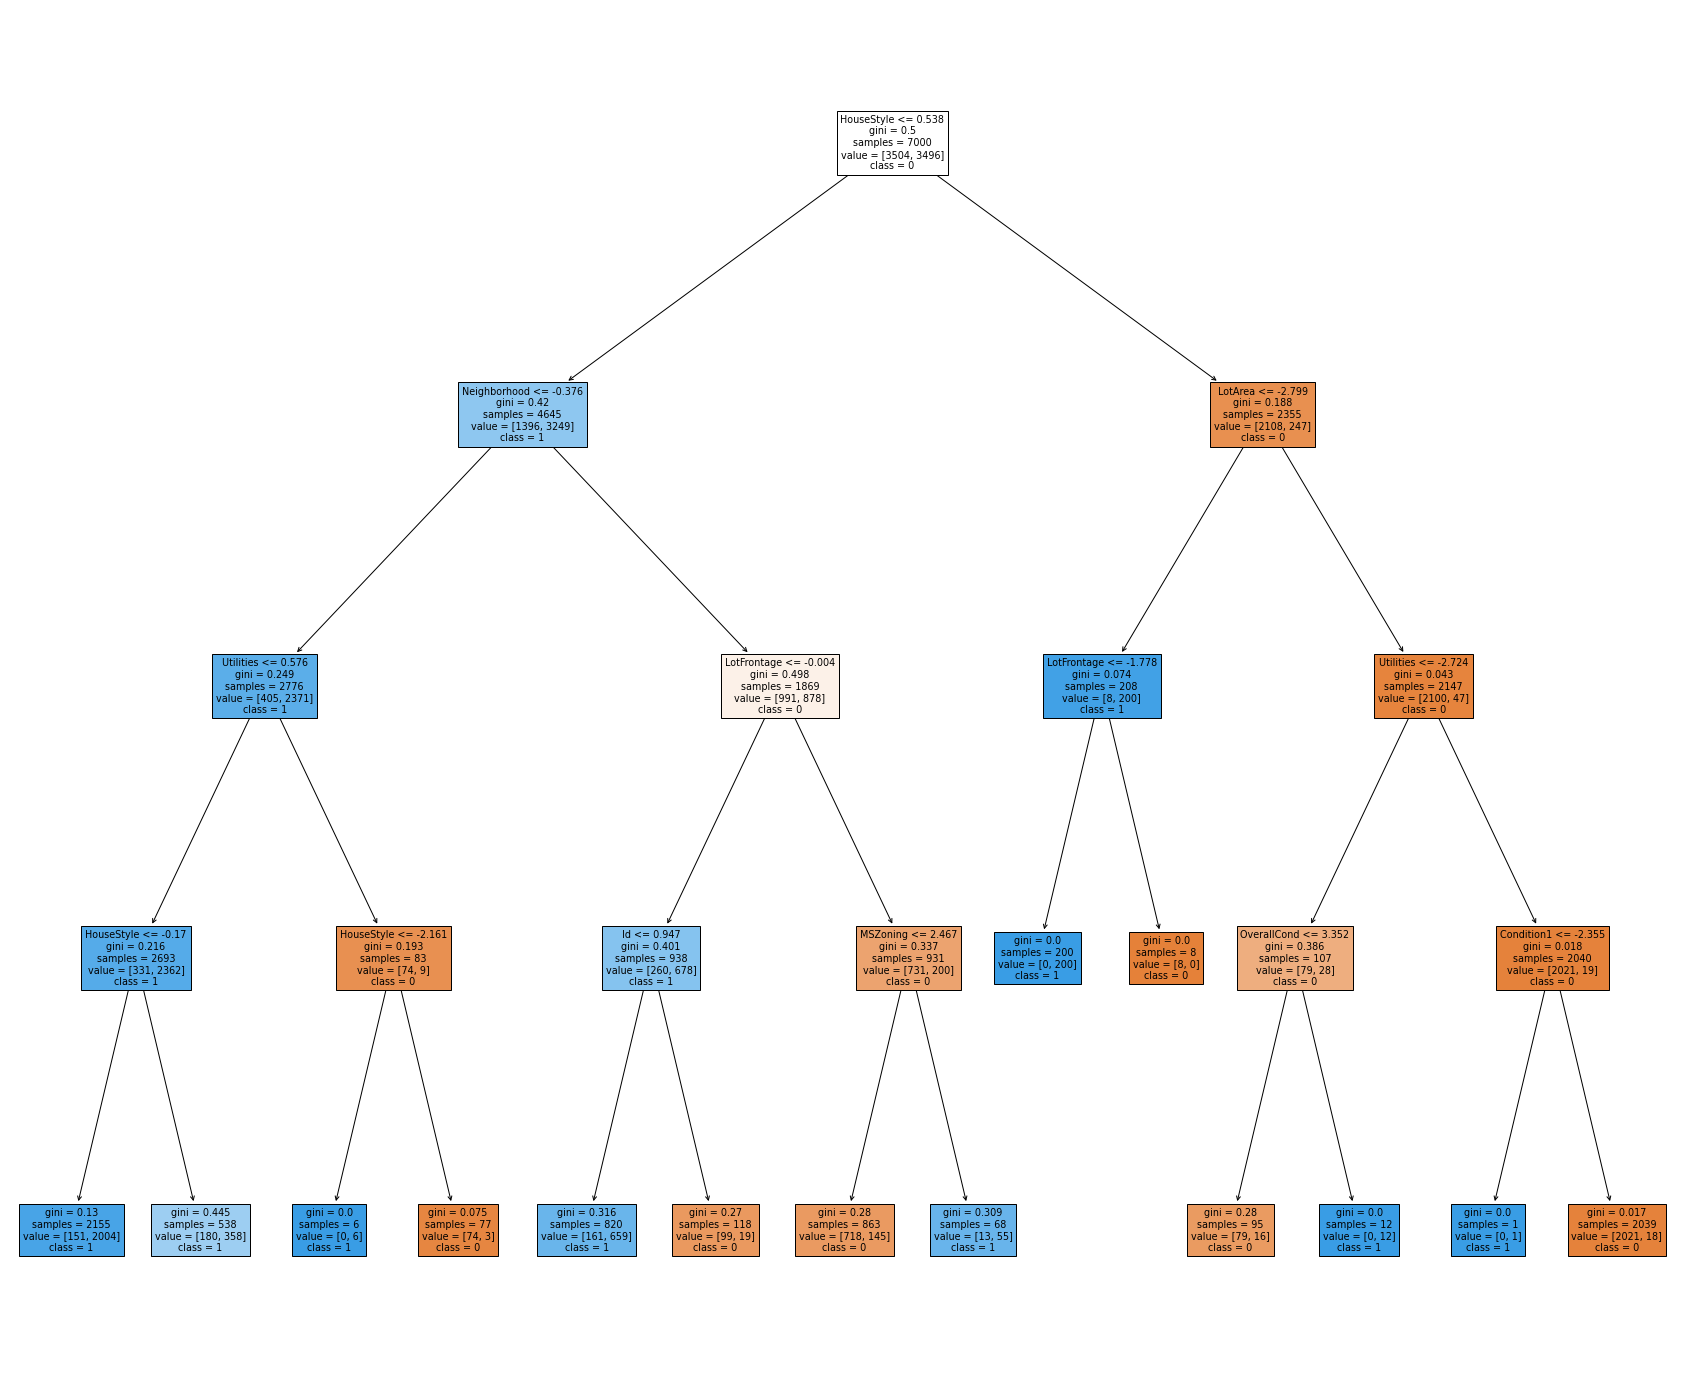

In [41]:
fig1 = plt.figure(figsize=(30,25))
tree.plot_tree(arbol,feature_names=datos.columns,
                class_names=['0','1','2'],filled=True )
plt.savefig('tree-ex8.png')

#### Árbol de clasificación vs Naive Bayes


En nuestro caso, podemos decir que el algoritmo de Naive Bayes es más eficiente. Esto lo podemos demostrar con el score de accuracy que nos dio ya que es de 0.9178, mientras que el del árbol de clasificación es de 0.8976.

De igual manera, al comparar los valores obtenidos con el test de precision, los datos de Naive Bayes, son más cercanos a 1, ya que obtuvimos un resultado de 0.9178, comparado al del árbol, donde se obtuvo 0.9022.

Podemos concluir que el modelo de Naive Bayes utilizado es más eficiente y también se afirma, con la cantidad de tiempo que tardó en ejecutarse y mostrar resultados; estos fueron más rápidos en generarse y fue más acertado.